In [1]:
import mlrose_hiive as mh

In [2]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [3]:
import pandas as pd

In [ ]:
# differet problem sizes
# small - 14
# tiny 7

In [4]:
# # Flip Flop
problem_ffp_small = mh.FlipFlopGenerator().generate(seed=0, size=14)
#state = problem_ffp.get_state()

In [5]:
# GA runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp_small,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[5, 10],
              mutation_rates=[0.4, 0.5]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [64]:
df_run_curves_ffp.shape

(2161, 7)

In [110]:
df_run_curves_ffp['Fitness'].max()

13.0

In [67]:
# need to check Time and FEvals

In [111]:
df_run_curves_ffp.dtypes

Iteration            int64
Time               float64
Fitness            float64
FEvals             float64
Population Size      int64
Mutation Rate      float64
max_iters            int64
dtype: object

In [112]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [113]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
659,94,0.150235,13.0,99.0,5,0.5,2048


In [114]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,5,0.5,99.0,94.0,0.150235


In [16]:
# tentatively, pick pop size = 5 and mutation_rate = 0.5, as they are the only choice

In [115]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000429,5.0,0.0,5,0.4,2048
1,1,0.008607,8.0,2.0,5,0.4,2048
2,2,0.013493,8.0,3.0,5,0.4,2048
3,3,0.018380,9.0,5.0,5,0.4,2048
4,4,0.019705,10.0,7.0,5,0.4,2048


In [6]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [7]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp_small,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[5],
              mutation_rates=[0.5])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [10]:
df_iter_curves_ffp.to_csv("../../csv-files/df_iter_curves_14_ga.csv")

In [11]:
df_iter_curves_ffp.shape

(2942, 7)

In [12]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000922,5.0,0.0,5,0.5,2048
1,1,0.011912,8.0,2.0,5,0.5,2048
2,2,0.017966,8.0,3.0,5,0.5,2048
3,3,0.022968,9.0,5.0,5,0.5,2048
4,4,0.023795,10.0,7.0,5,0.5,2048


In [13]:
df_iter_curves_ffp.Iteration.max()

546

In [14]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [15]:
df_fitness_iter_ffp.shape

(547, 3)

In [16]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,7.3,3.788889
1,1,8.9,1.433333
2,2,8.9,1.433333
3,3,9.1,0.988889
4,4,9.2,1.066667


In [17]:
df_iter_curves_ffp.Fitness.max()

13.0

In [18]:
# semi-converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == df_iter_curves_ffp.Fitness.max()-1].Iteration.min()

97

In [23]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

nan

In [19]:
for i in range(98, df_fitness_iter_ffp.shape[0]+1):
    if df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration >= i].avg_fitness.min() >= 13-1:
        print(i)
        break

333


In [20]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [21]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,7.3,3.788889,1.946507
1,1,8.9,1.433333,1.197219
2,2,8.9,1.433333,1.197219
3,3,9.1,0.988889,0.994429
4,4,9.2,1.066667,1.032796


Text(0, 0.5, 'Fitness')

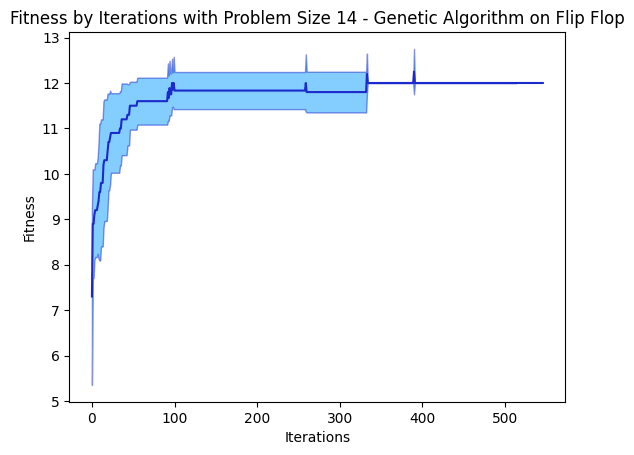

In [22]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#1B2ACC')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#1B2ACC', facecolor='#089FFF')
plt.title('Fitness by Iterations with Problem Size 14 - Genetic Algorithm on Flip Flop')
plt.xlabel('Iterations')
plt.ylabel('Fitness')